In [1]:
import numpy as np
import math
from random import *

In [2]:
class Ship:
    
    def __init__(self):
        self.x = None 
        self.y = None
        self.vx = None 
        self.vy = None 
        self.v_theta = (None, None)
        
    def __str__(self):
        return f'{self.x}, {self.y} --> {self.vx}vX, {self.vy}vY == == {self.v_theta}'
    
    def __repr__(self):
        return f'{self.x}, {self.y} --> {self.vx}vX, {self.vy}vY == {self.v_theta}'
        
    def start_coord(self, x, y, vx, vy):
        self.x = x 
        self.y = y
        self.vx, self.vy = vx, vy 
    
    def start_ang(self, x, y, v_theta):
        self.x = x
        self.y = y
        self.v_theta = v_theta 
    
    def compVelocity(self):
        if self.v_theta[0] == None:
            print('Velocity is already in components')
            return
        self.vx = self.v_theta[0]*math.cos(math.radians(self.v_theta[1]))
        self.vy = self.v_theta[0]*math.sin(math.radians(self.v_theta[1]))


def detectCollision(s1, s2, shipLength = 1):
#     xa0: initial x position of point A
# xat: speed in x direction of point A
# ya0: initial y position of point A
# yat: speed in y direction of point A

# xb0 initial x position of point B
# xbt speed in x direction of point B
# yb0 initial y position of point B
# ybt speed in y direction of point B
    #     mintime = 
    #   -(xa0*xat - xat*xb0 - (xa0 - xb0)*xbt + ya0*yat - yat*yb0 - (ya0 - yb0)*ybt) 
    #   /
    #   (xat^2 - 2*xat*xbt + xbt^2 + yat^2 - 2*yat*ybt + ybt^2)
    s1.compVelocity()
    s2.compVelocity()
    

    deno = (s1.vx**2 - 2*s1.vx*s2.vx + s2.vx**2 + s1.vy**2 - 2*s1.vy*s2.vy + s2.vy**2)
    if deno == 0:
        return True, None, None 
    
    
    mintime =   -(s1.x*s1.vx - s1.vx*s2.x - (s1.x - s2.x)*s2.vx + s1.y*s1.vy - s1.vy*s2.y - (s1.y - s2.y)*s2.vy) / deno
  
            
    
    if mintime < 0:
        return True, None, None
    else:
        mindist = math.sqrt(
                  (mintime*s1.vx - mintime*s2.vx + s1.x - s2.x)**2 
                  + 
                  (mintime*s1.vy - mintime*s2.vy + s1.y - s2.y)**2
                )
        #print(f'Position s1:  {s1.x + mintime*s1.vx}, {s1.y + mintime*s1.vy}')
        #print(f'Position s2:  {s2.x + mintime*s2.vx}, {s2.y + mintime*s2.vy}')
        if shipLength > mindist: # collided
            res = False, mintime, mindist
        else:
            res = True, mintime, mindist
        return res



    

In [3]:
# test 1
s1 = Ship()
s1.start_coord(12,101.01,10,0)

s2 = Ship()
s2.start_coord(1000,100,-10,0)

print(s1)
print(s2)
collisionFree, mintime, mindist = detectCollision(s1,s2)
print(collisionFree, mintime, mindist)


12, 101.01 --> 10vX, 0vY == == (None, None)
1000, 100 --> -10vX, 0vY == == (None, None)
Velocity is already in components
Velocity is already in components
True 49.4 1.0100000000000051


In [16]:
max_speed = 40 # kmph
min_speed  = 25   # kmph
par_l2r = 5 # left to right parallel
par_r2l = 10 # right to left parallel
inc_l2r = 8 # incline left to right
inc_r2l = 8 # incline right to left 
sep_dist = 5 # min separation between ships
sim_time = 4 # hpurs 
start_bound = 10  # inital position spawn
max_x = 250 # max range of area
max_y = 250 # max range of area
    
def get_start_loc(pos='left'):
    global max_x, max_y, start_bound
    
    
    y = randrange(1, max_y)
    if pos == 'right':
        
        x = max_x - uniform(0, start_bound)
        print(x)
    else:
        x = uniform(0, start_bound)
    return x,y
        
        

def get_speed(pos, min_theta, max_theta):
    global max_speed, min_speed
    if min_theta == max_theta:
        theta = min_theta
    else:
        theta = uniform(min_theta, max_theta)
    speed = randrange(min_speed,max_speed)
    assert speed > 0
    if pos == 'right':
        theta = 90 + 90 - theta
    elif pos == 'left':
        if theta < 0:
            theta = 360 + theta
   
    return speed, theta



def check_for_collisions(ships, new_ship, sep_dist, sim_time):
    for s in ships:
        collisionFree, mintime, mindist = detectCollision(s,new_ship,sep_dist)
        if not collisionFree:
            if mintime < sim_time:
                return False
            else:
                print(f'Warning: colliding but beyond sim time {mintime}h {sim_time}h {s} <-> {new_ship}')
    return True 
        
def gen_ships(ship_count, pos, theta_low, theta_high, ships):
    global sep_dist, sim_tim
    it_count = 0
    for i in range(ship_count):

        collisionFree = False 
        
        while not collisionFree:
            x,y = get_start_loc(pos)
            v_theta = get_speed(pos, theta_low, theta_high)
            
            new_ship = Ship()
            new_ship.start_ang(x, y, v_theta)
            collisionFree = check_for_collisions(ships, new_ship, sep_dist, sim_time)
            if collisionFree:
                ships.append(new_ship)
            it_count = it_count+1
    print(f'{it_count/ship_count} it for generating {ship_count} ships')
    return ships
    
# # generate few parallel lanes (left to right)

ships = gen_ships(par_l2r, 'left', 0,0, [])
ships = gen_ships(par_r2l, 'right', 0,0, ships)
ships = gen_ships(inc_l2r, 'left', 30, -10, ships)
ships = gen_ships(inc_r2l, 'right', 30, -10, ships)

for s in ships:
    print(s)

1.0 it for generating 5 ships
248.14283638353683
246.78728720747992
245.4569909222621
241.7317311098581
243.1166405290106
248.23248980298752
249.8607767974844
244.32264626501768
249.162505828011
241.50135146087044
241.96147135230908
242.3411744463556
242.5496101483127
1.3 it for generating 10 ships
2.375 it for generating 8 ships
243.84986897497208
246.98212393965872
248.53232116301587
245.484053616603
248.3941036931762
244.82912035305068
243.24974612152505
248.73115576201909
248.19770013263803
245.2299231257985
1.25 it for generating 8 ships
1.003144867596234, 238 --> 36.0vX, 0.0vY == == (36, 0)
7.88738851535234, 61 --> 31.0vX, 0.0vY == == (31, 0)
6.553422727706475, 96 --> 35.0vX, 0.0vY == == (35, 0)
4.4019654425712105, 126 --> 33.0vX, 0.0vY == == (33, 0)
0.1680800981243924, 147 --> 31.0vX, 0.0vY == == (31, 0)
248.14283638353683, 227 --> -32.0vX, 3.91886975727153e-15vY == == (32, 180)
246.78728720747992, 22 --> -27.0vX, 3.3065463576978537e-15vY == == (27, 180)
245.4569909222621, 206 -

0 249.8607767974844 0 283.0706297935322


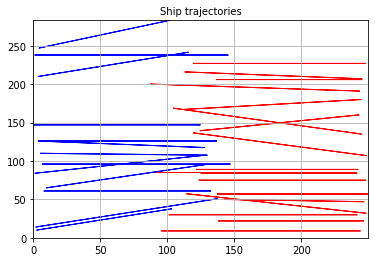

             sid           x           y       end_x       end_y         vx  \
count  31.000000   31.000000   31.000000   31.000000   31.000000  31.000000   
mean   15.000000  144.175080  112.161290  121.690105  120.254969  -5.621244   
std     9.092121  121.125053   72.683376   15.961560   73.178537  31.683297   
min     0.000000    0.168080    9.000000   88.114873    9.000000 -38.933749   
25%     7.500000    4.317060   59.000000  113.618600   59.136598 -32.505126   
50%    15.000000  241.961471   96.000000  124.232490  107.317801 -27.000000   
75%    22.500000  245.470522  170.000000  134.144677  167.915365  30.960858   
max    30.000000  249.860777  247.000000  146.553423  283.070630  36.000000   

                 vy          v       theta        dist  
count  3.100000e+01  31.000000   31.000000   31.000000  
mean   2.023420e+00  31.774194  129.542253  127.096774  
std    3.905508e+00   3.565667  101.593779   14.262667  
min   -5.130349e+00  26.000000    0.000000  104.000000  
25%

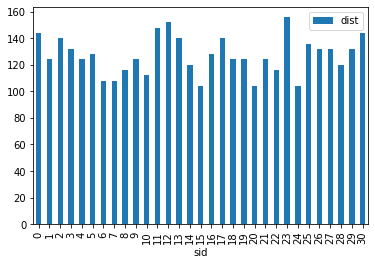

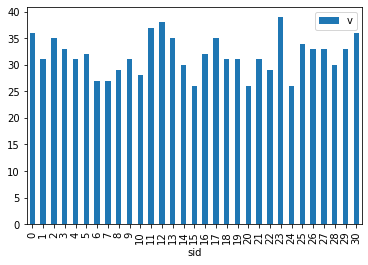

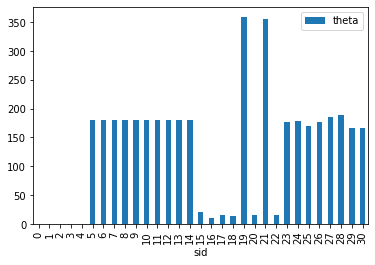

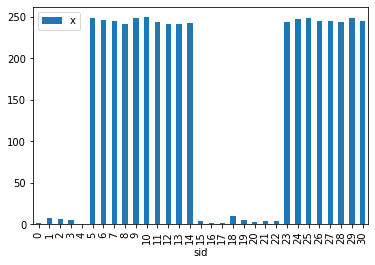

In [18]:
# lets plot
import matplotlib.pyplot as plt
import pandas as pd 
ax = plt.axes()
xmin = 0
xmax = 0
ymin = 0
ymax = 0

rows = []
for i,s in enumerate(ships):
    
    ex = s.vx * sim_time + s.x
    ey = s.vy * sim_time + s.y
    
    if s.x < max_x / 2:
        ec = 'blue'
    else:
        ec = 'red'
    dist = math.sqrt((ex-s.x)**2 + (ey - s.y)**2)
    rows.append([i, s.x, s.y, ex, ey, s.vx, s.vy, s.v_theta[0], s.v_theta[1], dist ])
    
    ax.arrow(s.x, s.y, s.vx * sim_time, s.vy * sim_time, head_width=0.5, head_length=0.7, fc='lightblue', ec=ec)
    xmin = min(xmin, ex, s.x)
    ymin = min(ymin, ey, s.y)
    xmax = max(xmax, ex, s.x)
    ymax = max(ymax, ey, s.y)

plt.grid()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
print(xmin, xmax, ymin, ymax)

plt.title('Ship trajectories',fontsize=10)

# plt.savefig('how_to_plot_a_vector_in_matplotlib_fig1.png', bbox_inches='tight')
plt.show()
df = pd.DataFrame(rows, columns=['sid', 'x', 'y', 'end_x', 'end_y', 'vx', 'vy', 'v', 'theta', 'dist'])
df.plot.bar('sid', 'dist')
df.plot.bar('sid', 'v')
df.plot.bar('sid', 'theta')
df.plot.bar('sid', 'x')
print(df.describe())
# plt.close()

In [19]:
# change the frame of reference and write to the ini file 
import configparser
# edit this file path
inp_file = 'boat/boat.ini'
out_file = f'boat/mobility_{par_l2r}_{par_r2l}_{inc_l2r}_{inc_r2l}.ini'
wave_height = '2m'

# do not edit 
bound_x = 0
bound_y = 0

config = configparser.ConfigParser()
config.optionxform=str
config.read(inp_file)
for i,row in df.iterrows():
    print(row['x']-xmin, row['y']-ymin)
    bound_x = max(bound_x, row['end_x'])
    bound_y = max(bound_y, row['end_y'])
    # create an entry for this ship
    config['General'][f'**.host[{i}].mobilityType'] = '"BoatMobility"'
    config['General'][f'**.host[{i}].mobility.maxWaveHeight'] = wave_height
    config['General'][f'**.host[{i}].mobility.pos_x'] = f'{int(row["x"]-xmin)*1000}m'
    config['General'][f'**.host[{i}].mobility.pos_y'] = f'{int(row["y"]-ymin)*1000}m'
    
    config['General'][f'**.host[{i}].mobility.pos_z'] = '0m'
    config['General'][f'**.host[{i}].mobility.initialMovementHeading'] = f'{row["theta"]}deg'
    config['General'][f'**.host[{i}].mobility.speed'] = f'{row["v"]*1000/3600}mps' 

# specify bounds
config['General']['**.constraintAreaMaxX'] = f'{(bound_x-xmin)*1.2*1000}m'
config['General']['**.constraintAreaMaxY'] = f'{(bound_y-ymin)*1.2*1000}m'
config['General']['**.mobility.Hosts'] = f'{len(df)}'
config['General']['**.numNodes'] = f'{len(df)}'

# write the reference file
with open(out_file, 'w') as configfile:
    config.write(configfile)


1.003144867596234 238.0
7.88738851535234 61.0
6.553422727706475 96.0
4.4019654425712105 126.0
0.1680800981243924 147.0
248.14283638353683 227.0
246.78728720747992 22.0
245.4569909222621 206.0
241.7317311098581 84.0
248.23248980298752 75.0
249.8607767974844 57.0
244.32264626501768 9.0
241.50135146087044 85.0
241.96147135230908 30.0
242.5496101483127 89.0
4.232155035339343 247.0
1.1649618607288281 84.0
1.798254950656002 14.0
9.757642405951998 65.0
5.3533747067767905 110.0
2.4537223344687167 10.0
3.5855501369074707 126.0
3.6323129800595098 210.0
243.84986897497208 191.0
246.98212393965872 47.0
248.53232116301587 32.0
245.484053616603 207.0
244.82912035305068 180.0
243.24974612152505 160.0
248.73115576201909 107.0
245.2299231257985 135.0
